# SME0828 - Introdução à Ciência de Dados (2020)


### Projeto: Classificação
### Universidade de São Paulo, São Carlos, Brasil.
#### Professor:
Francisco Aparecido Rodrigues, francisco@icmc.usp.br.
#### Alunos:
Luiz Gustavo Ribeiro - 5967710 <br>
Pedro Stefanelli - 8531272  <br>
Diego Talarico - 3166561

### Exercício 10

Realize a classificação da base Titanic. Use os métodos de seleção de modelos e determine o melhor
modelo e seus hiperparâmetros. Use também seleção de atributos e tente melhorar os resultados. <br />


#### Importando bibliotecas

In [20]:
#Algebra Linear
import numpy as np 

# Processamento/manipulação dos dados
import pandas as pd 

# Visualização dos dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algoritimos Machine Learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#### Lendo dados

In [21]:
test_df = pd.read_csv("./titanic/test.csv")
train_df = pd.read_csv("./titanic/train.csv")

# verificando informações do conjunto de treinamento. Verifica que tem valores nulos no satributos Age e Cabin
# verifica tb o tipo dos atributos  integer , string e float

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



#### Análise Exploratória de Dados

In [22]:
# mostrando as 5 primeiras linhas do dataset de treinamento
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# verificando a % de valores nulos/ausentes nos atributos do dataset

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [24]:
# comparando a taxa de sobrevivencia entre os atributos Age, SibSp, Parch, and Fare 

pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [25]:
# Separando os atributos numericos e categoricos para desenhar os grafios

df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

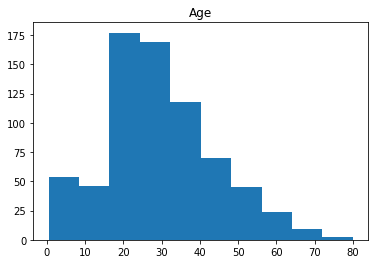

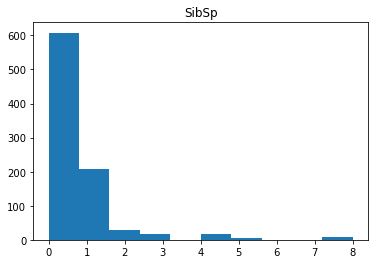

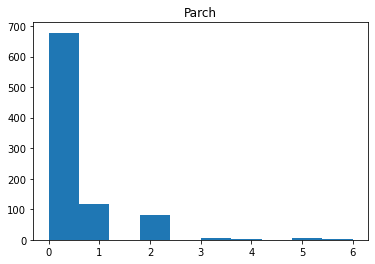

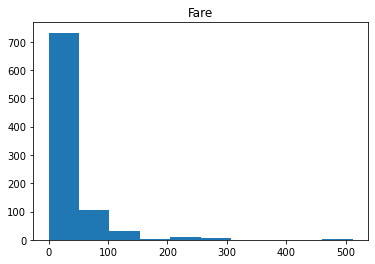

In [26]:
# Distribuição de todas as variaveis numericas 

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

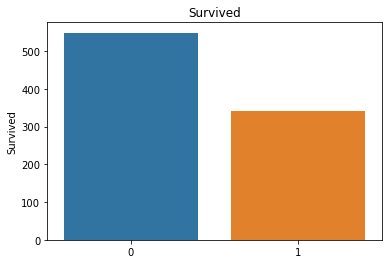

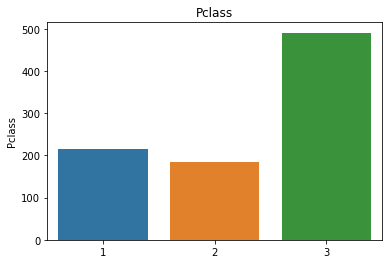

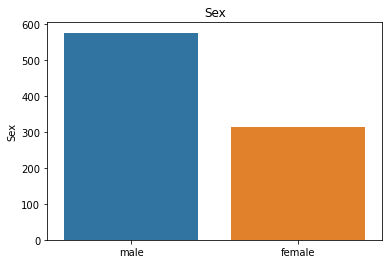

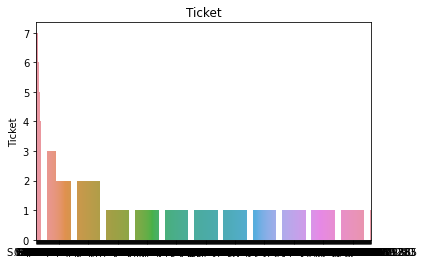

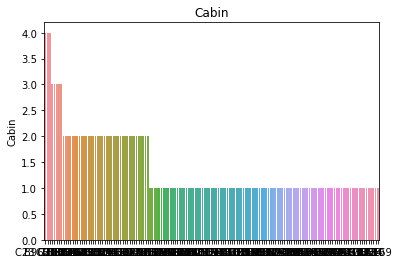

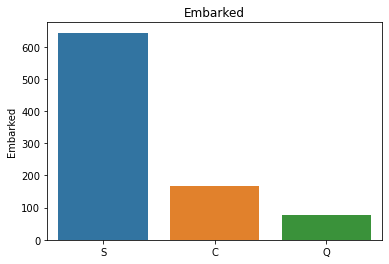

In [27]:
# Distribuição de todas as variaveis categoricas
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
# a classe que vamos predizer possui um desbalanceamento

In [28]:
# Comparando a variavel de interesse com a as variaveis categoricas 

print(pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


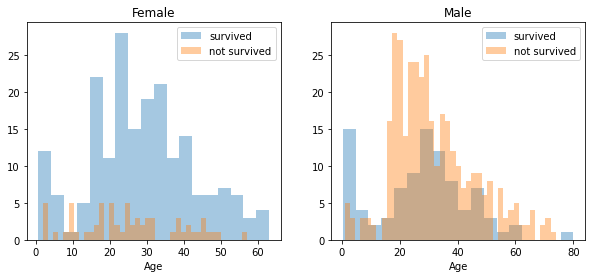

In [29]:
# verificando a distribuição de sobrevivente e nao sobreviventes por idade agrupando entre homem e mulher

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


As mulheres tem uma maior taxa de sobrevivencia comparado com os homens. Entre as mulheres a faixa de idade que mais sobreviveu foi entre 15 a 40 anos. Entre os homens a faixa de idade para uma maior taxa de sobrevivencia é entre 18 a 30 anos.

C:\Users\monitora\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


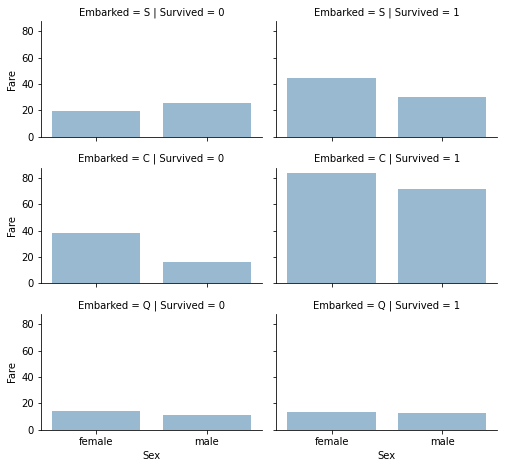

In [30]:
# Correlacionando atributos categoricos com numericos 
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

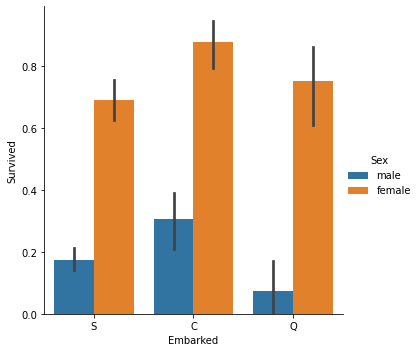

In [31]:
sns.catplot(x='Embarked',y='Survived',data=train_df,kind='bar',hue='Sex')

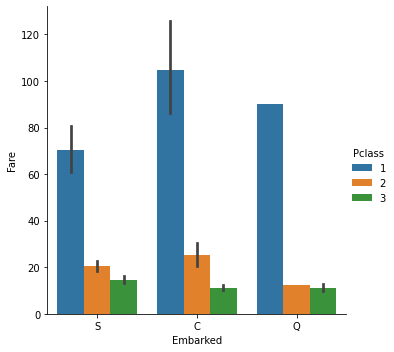

In [32]:
sns.catplot(x='Embarked',y='Fare',data=train_df,kind='bar',hue='Pclass')

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64 

Familia com mais de dois filhos tem menos chance de sobreviver


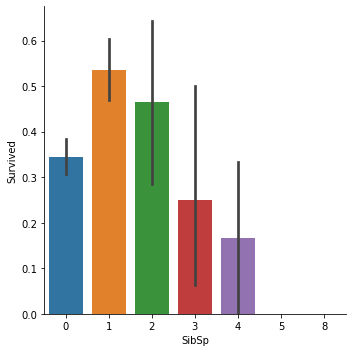

In [33]:
# Irmao vs Sobreviventes
sns.catplot(x='SibSp',y='Survived',data=train_df,kind='bar')
print(train_df.groupby('SibSp')['Survived'].mean(),'\n\nFamilia com mais de dois filhos tem menos chance de sobreviver')

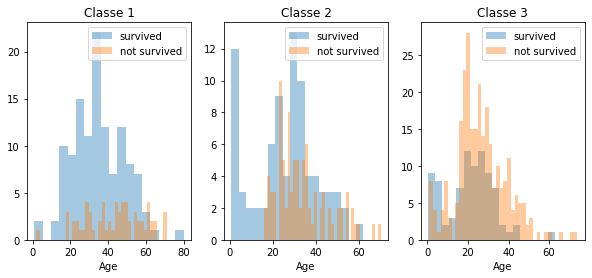

In [34]:
# verificando a distribuição de sobrevivente e nao sobreviventes por idade agrupando entre classes
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))
class1 = train_df[train_df['Pclass']==1]
class2 = train_df[train_df['Pclass']==2]
class3 = train_df[train_df['Pclass']==3]
ax = sns.distplot(class1[class1['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(class1[class1['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Classe 1')
ax = sns.distplot(class2[class2['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(class2[class2['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Classe 2')
ax = sns.distplot(class3[class3['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde = False)
ax = sns.distplot(class3[class3['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde = False)
ax.legend()

_ = ax.set_title('Classe 3')

Passageiros que pagaram as maiores taxas no bilhete entraram pelo portal C e tiveram maior taxa de sobrevivencia, principalmente as mulheres.

#### Correlacioando e criando novas features

<AxesSubplot:>

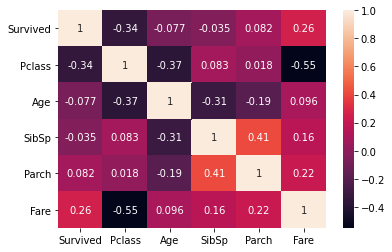

In [35]:
# a matriz de correlação mostra a correlação entre cada coluna

sns.heatmap(train_df.drop('PassengerId',axis=1).corr(),annot=True) 

# pela matriz de correlação as variaves parch e sibSp apresentaram uma correlação de 0.41
# sibsp:  Número de irmãos / cônjuges a bordo do Titanic  
# parch:  Número de pais / filhos a bordo do Titanic
#

In [36]:
# decidi nao usar essas colunas pois "possiveis" informações dessas features ja consegui pclass.
# o seu tratamento parece ser custoso

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)


In [37]:
# removendo outliers

from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # ierando as colunas 
    for col in features:
        # 1° quartil (25%)
        Q1 = np.percentile(df[col], 25)
        # 3° quartil (75%)
        Q3 = np.percentile(df[col],75)
        # faixa Interquartil (IQR)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        # Por coluna (feature) determinando uma lista de indices de outliers
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # adicionando numa lista  
        outlier_indices.extend(outlier_list_col)
        
    # selecionando observações que contem mais de 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detectando outliers das colunas  Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_df,2,["Age","SibSp","Parch","Fare"])     

In [38]:
# removendo outliers
train = train_df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train_len = len(train)

# Concatenando dataset de treino e teste
total=pd.concat([train.drop('Survived',axis=1),test_df])
class_predicted = train.Survived.copy()

total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [39]:
# # Preenchendo valores faltantes  na coluna Age.
# total['Age'] = total['Age'].astype(float)
# print(total.isnull().sum())
# # Esta estrategia é com base na matriz de correlação com valores altos negativos entre Age e Pclass, Parch e SibSp
# # Preenche Age com a mediana das idades somente quando as linhas forem similares entre o seu par da Pclass, Parch e SibSp

# # retornando index da coluna Age dos valores nulos
# index_NaN_age = total[total['Age'].isnull()].index.tolist()
# print(len(index_NaN_age))
# age_med = total["Age"].median()
# count = 0
# for i in index_NaN_age:
#     print('vai subistituir ',total.iloc[i,4])
#     age_pred = total["Age"][((total['SibSp'] == total.iloc[i]["SibSp"]) & (total['Parch'] == total.iloc[i]["Parch"]) & (total['Pclass'] == total.iloc[i]["Pclass"]))].median()
#     if not (np.isnan(age_pred)) and (np.isnan(total.iloc[i,4])) :
#         count += 1
#         print('count: ',total.iloc[i,4], count , age_pred )
# #         total.at['Age', 'i'] = age_pred
# #         total.ix[i, 'Age'] = age_pred
#         total.iloc[i, total.columns.get_loc('Age')] = age_pred
# #         total['Age'].iloc[i] = age_pred
#     else :
#         total.iloc[i, total.columns.get_loc('Age')] = age_med
#         count += 1
#         print('count_nan: ',count )

In [40]:
print(total.isnull().sum())

# Outra tecnica foi usada analisando somente o par entre as maiores correlações encontrada na matriz
total['Age'] = total.groupby(['Pclass', 'SibSp', 'Parch'])['Age'].transform(lambda x: x.fillna(x.median()))
total['Age'] = total.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# sobstituindo os valores Nan pela mediana da fare agrupada por Pclass
total['Fare'] = total.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median())) 

# calculando a classe mais frequente para ser usada no preenchimento da coluna de 'Embarked'
freq_port = total.Embarked.dropna().mode()[0]
print(freq_port)
total["Embarked"] = total["Embarked"].fillna(freq_port)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64
S


In [41]:
# verificndo se possui mais nulos
total = total.fillna(np.nan)
print(total.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<AxesSubplot:>

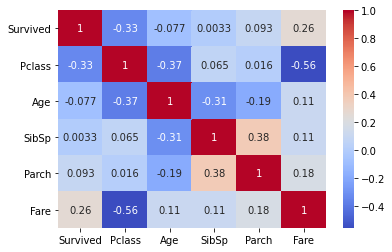

In [42]:
sns.heatmap(train.drop('PassengerId',axis=1).corr(),annot=True, cmap = "coolwarm")
# a matriz de correlação nao mudou muito com o aumento do dataset
# identifica se que o atributo Fare tem correlação com a probalidade de Sobrevivencia(Survived)
# Asimm como Parch e SibSp estão correlacionados

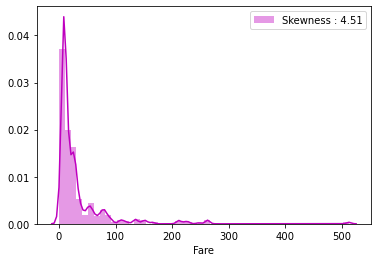

In [43]:
# Verificando a distribuição de Fare 
g = sns.distplot(total["Fare"], color="m", label="Skewness : %.2f"%(total["Fare"].skew()))
g = g.legend(loc="best")

In [44]:
# Apply log to Fare to reduce skewness distribution
total["Fare"] = total["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

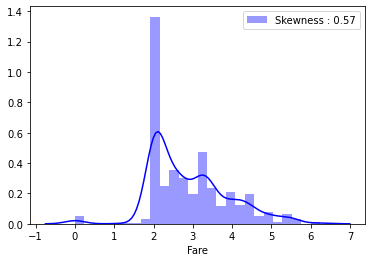

In [45]:
# Vwerificando a distribuição de Fare 
g = sns.distplot(total["Fare"], color="b", label="Skewness : %.2f"%(total["Fare"].skew()))
g = g.legend(loc="best")

In [46]:
train = total[:train_len].copy()
test = total[train_len:].copy()
train['Survived'] = class_predicted

#### Transformando variáveis categóricas em numericas

In [47]:
# tranformando em faixas de valores das taxas do bilhete com intuito de subistituir 
# os esses valor continuo em numericos ordinais.
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 2.066]",0.197309
1,"(2.066, 2.671]",0.303571
2,"(2.671, 3.418]",0.456221
3,"(3.418, 6.239]",0.594470


In [48]:
# numeros que representam as faixas do valor das taxas. 
combine = [train, test]
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 2.066, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 2.066) & (dataset['Fare'] <= 2.671), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 2.671) & (dataset['Fare'] <= 3.418), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 3.418, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train = train.drop(['FareBand'], axis=1)
combine = [train, test]

In [49]:
train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,3,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,0,S,0
5,6,3,"Moran, Mr. James",male,25.0,0,0,0,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,2,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,2,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,0,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,2,C,1


In [50]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,0,S


In [51]:
# Convertendo atributo Sex em numerico onde female=1 and male=0
combine = [train, test]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [52]:
# Convertendo atributo categorico Embarked em numerico onde 'S': 0, 'C': 1 e 'Q': 2.
combine = [train, test]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [53]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.532110
1,"(16.336, 32.252]",0.339662
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [54]:
# tranformando em faixas de idades e atribuindo um valor numerico
combine = [train, test]
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train = train.drop(['AgeBand'], axis=1)


In [55]:
# Na matriz de correlação Pearson identificou-se uma alta correlação em pais e numeros de irmaos. 
# Assim a ideia é criar uma coluna que representa faminilia ou sozinho. 
# Nos graficos acima notou se que familia com mais de dois filhos tem  baixa taxa de sobrevivencia

combine = [train, test]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000


In [56]:
# Ele esta = { sozinho = 1, em familia = 0}
combine = [train, test]
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [57]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone
0,1,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0,0,2,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1,1,2,0
2,3,3,"Heikkinen, Miss. Laina",1,1,0,0,0,0,1,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,2,0,1,2,0
4,5,3,"Allen, Mr. William Henry",0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,2,"Montvila, Rev. Juozas",0,1,0,0,0,0,0,1,1
877,888,1,"Graham, Miss. Margaret Edith",1,1,0,0,2,0,1,1,1
878,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0,1,2,2,0,0,4,0
879,890,1,"Behr, Mr. Karl Howell",0,1,0,0,2,1,1,1,1


In [58]:
# eliminando colunas que geraram novas features
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]


In [59]:
# Nota se 
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,39,0


In [60]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.589744
1,Miss,0.711111
2,Mr,0.157895
3,Mrs,0.793651
4,Rare,0.347826


In [61]:
combine = [train, test]
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Survived,IsAlone,Title
0,1,3,"Braund, Mr. Owen Harris",0,1,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,1,1,0,3
2,3,3,"Heikkinen, Miss. Laina",1,1,0,0,1,1,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,2,0,1,0,3
4,5,3,"Allen, Mr. William Henry",0,2,0,0,0,1,1


In [62]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]

In [63]:
train.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,IsAlone,Title
0,3,0,1,0,0,0,0,1
1,1,1,2,3,1,1,0,3
2,3,1,1,0,0,1,1,2
3,1,1,2,2,0,1,0,3
4,3,0,2,0,0,0,1,1


In [64]:
X = train.drop("Survived", axis=1).to_numpy()
y = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X.shape, y.shape, X_test.shape

((881, 7), (881,), (418, 7))

In [65]:
#trasnsformando no formato numpy e normalizando
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)

print('\nMedia: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))



Media:  [2.30760499 0.3507378  1.31555051 0.97956867 0.36549376 0.60953462
 1.72758229]
Desvio Padrao: [0.83458109 0.477201   0.83365432 1.20235875 0.63773775 0.48785466
 1.03108318]


#### Função que executa KFold e SearchGrid

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score

def classification_nested_crossvalidation(X, y, n_folds, model, hp_grid):
    # define a validação cruzada externa
    cv_outer = KFold(n_folds, shuffle=True)
    # Usando o constructor para criar o objeto sss
    sss = StratifiedShuffleSplit(n_splits = 20,       # 20 simulações.
                                 test_size = 0.2,     # 20% do dataset será de testes.
                                 random_state = 42)   # Permitir a reprodutibilidade.
    vauc = list()
    vprecision = list()
    vrecall = list()
    vaccuracy = list()
    # validação cruzada externa
    for train_out, test_out in cv_outer.split(X):
        train_x, train_y = X[train_out], y[train_out]
        test_x, test_y = X[test_out], y[test_out]
        
        # validação cruzada interna (treinamento and e validação dos hiperparametros)
        grid_search_cv = GridSearchCV(model, hp_grid, cv=sss, scoring='roc_auc', refit=True)
        
        # encontrando os melhores paramentros
        result = grid_search_cv.fit(train_x, train_y)
        best_model = result.best_estimator_

        # predição
        pred_y = best_model.predict(test_x) 
        
        # validação e exlporando as metricas 
        fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
        auc = metrics.auc(fpr, tpr)
        vauc.append(auc)
        
        precision = precision_score(test_y, pred_y, average='macro', zero_division = 0)
        vprecision.append(precision)
        
        recall = recall_score(test_y, pred_y, average='macro')
        vrecall.append(recall)
        
        accuracy = accuracy_score(test_y, pred_y)
        vaccuracy.append(accuracy)
        
        # explorando o melhor modelo

        print('\nKfolds Score')
        print('\nBest Score: ', result.best_score_)

        # modelo atual om os melhores parametros
        
        print('Best Estimators: ',result.best_estimator_)
        print('Best hyperparameters (extern): ', result.best_params_)
        print(classification_report(test_y, pred_y))
        print('.', end="")      
        
    print('\n Analise das métricas pelo método Kfolds')
    
    av_accuracy = np.mean(accuracy)
    std_accuracy = np.std(accuracy)
    av_auc = np.mean(vauc)
    std_auc = np.std(vauc)
    av_prec = np.mean(vprecision)
    std_prec = np.std(vprecision)
    av_vrecall = np.mean(vrecall)
    std_vrecall = np.std(vrecall)
    
        
    return av_accuracy, std_accuracy, av_auc, std_auc, av_prec, std_prec, av_vrecall, std_vrecall, best_model

#### Função que executa StratifiedKFold e SearchGrid

In [104]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score

def classification_StratifiedKFold(X, y, n_folds, model, hp_grid):
# usando metodo estratificado, usa uma amostra mais representativa do dataset 
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    

#     StratifiedShuffleSplit, que fornece uma divisão aleatória de seus 
#     dados (após embaralhamento) que preserva a distribuição do rótulo. As pontuações 
#     só são significativas se forem calculadas em dados que o classificador nunca viu. 
#     Isso é extremamente importante, pois qualquer pontuação obtida nos dados que foram 
#     usados para ajustar o classificador é completamente irrelevante.
    
    sss = StratifiedShuffleSplit(n_splits = 20,       # 20 simulações.
                                 test_size = 0.2,     # 20% do dataset será de testes.
                                 random_state = 42)   # Permitir a reprodutibilidade.
    vauc = list()
    vprecision = list()
    vrecall = list()
    vaccuracy = list()
    bkp_recall = 0
    dic_metrica = {'accuracy': 0, 'auc': 0, 'precision': 0,  'recall': 0}
    dic_result_mean = {}
    for train_out, test_out in cv.split(X, y):
        train_x, train_y = X[train_out], y[train_out]
        test_x, test_y = X[test_out], y[test_out]
        
        # validação cruzada interna (treinamento and e validação dos hiperparametros)
        grid_search_cv = GridSearchCV(model, hp_grid, cv=sss, scoring='roc_auc', refit=True)
        
        # encontrando os melhores paramentros
        result = grid_search_cv.fit(train_x, train_y)
        best_model = result.best_estimator_                
        
        # predição
        pred_y = best_model.predict(test_x) 
        
        # validação e exlporando as metricas
        fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
        auc = metrics.auc(fpr, tpr)
        vauc.append(auc)
        
        precision = precision_score(test_y, pred_y, average='macro', zero_division = 0)
        vprecision.append(precision)
        
        recall = recall_score(test_y, pred_y, average='macro')
        vrecall.append(recall)
        
        accuracy = accuracy_score(test_y, pred_y)
        vaccuracy.append(accuracy)
        
        # usamos para retornar o melhor resultado da metrica 'precisao',
        # com finalidade de analisar a influencia do desbalancemaneto da classe alvo. 
        # TODO: fazer outras analises com outras metricas
        if precision > dic_metrica['precision']:
            dic_metrica['auc'] = auc
            dic_metrica['precision'] = precision
            dic_metrica['accuracy'] = accuracy
            dic_metrica['recall'] = recall       
        
        # explorando o melhor modelo 
        
#         print('\nStratifiedKFold Score')
#         print('\nBest Score: ', result.best_score_)

        # modelo atual om os melhores parametros
    
#         print('Best Estimators: ',result.best_estimator_)
#         print('Best hyperparameters (extern): ', result.best_params_)
#         print(classification_report(test_y, pred_y))
#         print('.', end="")      
        
#     print('\n Analise das métricas pelo método StratifiedKFold')
    
    dic_result_mean['av_accuracy'] = np.mean(vaccuracy)
    dic_result_mean['std_accuracy'] = np.std(vaccuracy)
    dic_result_mean['av_auc'] = np.mean(vauc)
    dic_result_mean['std_auc'] = np.std(vauc)
    dic_result_mean['av_prec'] = np.mean(vprecision)
    dic_result_mean['std_prec'] = np.std(vprecision)
    dic_result_mean['av_vrecall'] = np.mean(vrecall)
    dic_result_mean['std_vrecall'] = np.std(vrecall)
    
        
    return dic_result_mean, best_model, dic_metrica

#### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

n_folds = 5 # vc externo folds 

k_range = list(range(1, 32))
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan' , 'chebyshev', 'minkowski']

# create a parameter grid: map the parameter names to the values that should be searched
# criando o dicionario com os parametros que poderia ser pesquisado
parameters = dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)
print(parameters)

model = KNeighborsClassifier()
knn_av_acc, knn_std_acc, knn_av_auc, knn_std_auc, knn_av_prec, knn_std_prec, knn_av_vrecall, knn_std_recall, knn_best_model = classification_nested_crossvalidation(X, y, n_folds, model, parameters)

print('\nKFold')
print('ACC:', knn_av_acc, 'std:', knn_std_acc)
print('AUC:', knn_av_auc, 'std:', knn_std_auc)
print('Precision:', knn_av_prec, 'std:', knn_std_prec)
print('Recall:', knn_av_vrecall, 'std:', knn_std_recall)

knn_result_mean, knn_Strati_best_model, knn_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)

print('\nStratifiedKFold Mean')
for k, v in knn_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold')
for k, v in knn_best_metrica.items():
    print(k, ':', v)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

Kfolds Score

Best Score:  0.8477130325814537
Best Estimators:  KNeighborsClassifier(metric='manhattan', n_neighbors=24)
Best hyperparameters (extern):  {'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       123
           1       0.70      0.61      0.65        54

    accuracy                           0.80       177
   macro avg       0.77      0.75      0.76       177
weighted avg       0.80      0.80      0.80       177

.
Kfolds Score

Best Score:  0.8599723286504896
Best Estimators:  KNeighborsClassifier(metric='manhattan', n_neighbors=25)
Best hyperparameters (extern):  {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}
 

#### RandomForest

In [51]:
from sklearn.ensemble import RandomForestClassifier

n_folds = 5 # vc externo folds

parameters = {    
    'n_estimators':[10,50,100,150,200],
    'max_depth':[5,7,10,15,20],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy']
}

model = RandomForestClassifier()
rf_av_acc, rf_std_acc, rf_av_auc, rf_std_auc, rf_av_prec, rf_std_prec, rf_av_vrecall, rf_std_recall, rf_best_model = classification_nested_crossvalidation(X, y, n_folds, model, parameters)

print('\nKFold Mean')
print('ACC:', rf_av_acc, 'std:', rf_std_acc)
print('AUC:', rf_av_auc, 'std:', rf_std_auc)
print('Precision:', rf_av_prec, 'std:', rf_std_prec)
print('Recall:', rf_av_vrecall, 'std:', rf_std_recall)

rf_result_mean, rf_Strati_best_model, rf_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)

print('\nStratifiedKFold Mean')
for k, v in rf_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold best')
for k, v in rf_best_metrica.items():
    print(k, ':', v)


Kfolds Score

Best Score:  0.8573917238421955
Best Estimators:  RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt')
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       103
           1       0.92      0.59      0.72        74

    accuracy                           0.81       177
   macro avg       0.84      0.78      0.79       177
weighted avg       0.83      0.81      0.80       177

.
Kfolds Score

Best Score:  0.8786974789915967
Best Estimators:  RandomForestClassifier(max_depth=5, n_estimators=200)
Best hyperparameters (extern):  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.76      0.68      0.72        62

    accuracy 

.
StratifiedKFold Score

Best Score:  0.8704876212780196
Best Estimators:  RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt')
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.93      0.76      0.84        34

    accuracy                           0.89        88
   macro avg       0.90      0.86      0.88        88
weighted avg       0.89      0.89      0.88        88

.
 Analise com StratifiedKFold

StratifiedKFold Mean
av_accuracy : 0.8195097037793667
std_accuracy : 0.03989088548255213
av_auc : 0.796250742721331
std_auc : 0.04603230352339382
av_prec : 0.8178899270009039
std_prec : 0.04245289334205905
av_vrecall : 0.796250742721331
std_vrecall : 0.0460323035233938

StratifiedKFold
accuracy : 0.8863636363636364
auc : 0.8638344226579521
precision : 0.89761904761904

#### Arvore de decisao

In [52]:
from sklearn.tree import DecisionTreeClassifier

n_folds = 5 # vc externo folds 

parameters = {    
    'max_depth':[5,7,10,15,20],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini','entropy'],
    'max_leaf_nodes': [5,7,10,15,20], 
    'min_samples_split': [5,7,10]
}

model = DecisionTreeClassifier()
dt_av_acc, dt_std_acc, dt_av_auc, dt_std_auc, dt_av_prec, dt_std_prec, dt_av_vrecall, dt_std_recall, dt_best_model = classification_nested_crossvalidation(X, y, n_folds, model, parameters)

print('\nKFold')
print('ACC:', dt_av_acc, 'std:', dt_std_acc)
print('AUC:', dt_av_auc, 'std:', dt_std_auc)
print('Precision:', dt_av_prec, 'std:', dt_std_prec)
print('Recall:', dt_av_vrecall, 'std:', dt_std_recall)

dt_result_mean, dt_Strati_best_model, dt_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)
print('\nStratifiedKFold Mean')
for k, v in dt_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold best')
for k, v in dt_best_metrica.items():
    print(k, ':', v)


Kfolds Score

Best Score:  0.855928054491273
Best Estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=20, min_samples_split=7)
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': 20, 'min_samples_split': 7}
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       107
           1       0.78      0.70      0.74        70

    accuracy                           0.80       177
   macro avg       0.80      0.78      0.79       177
weighted avg       0.80      0.80      0.80       177

.
Kfolds Score

Best Score:  0.8463548318433377
Best Estimators:  DecisionTreeClassifier(max_depth=5, max_features='auto', max_leaf_nodes=20,
                       min_samples_split=7)
Best hyperparameters (extern):  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 20, 'min_samples_split': 7}

.
StratifiedKFold Score

Best Score:  0.8564110070257611
Best Estimators:  DecisionTreeClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=15,
                       min_samples_split=7)
Best hyperparameters (extern):  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'min_samples_split': 7}
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        54
           1       0.80      0.59      0.68        34

    accuracy                           0.78        88
   macro avg       0.79      0.75      0.76        88
weighted avg       0.79      0.78      0.78        88

.
StratifiedKFold Score

Best Score:  0.853069588491134
Best Estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=20, min_samples_split=10)
Best hyperparameters (extern):  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 20, '

#### Bagging

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_folds = 5 # vc externo folds


parameters = {
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
    
}

param_grid = {
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

model = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_features = 0.5)

bg_av_acc, bg_std_acc, bg_av_auc, bg_std_auc, bg_av_prec, bg_std_prec, bg_av_vrecall, bg_std_recall, bg_best_model = classification_nested_crossvalidation(X, y, n_folds, model, parameters)

print('\nKFold')
print('ACC:', bg_av_acc, 'std:', bg_std_acc)
print('AUC:', bg_av_auc, 'std:', bg_std_auc)
print('Precision:', bg_av_prec, 'std:', bg_std_prec)
print('Recall:', bg_av_vrecall, 'std:', bg_std_recall)

bg_result_mean, bg_Strati_best_model, bg_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)
print('\nStratifiedKFold Mean')
for k, v in bg_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold best')
for k, v in bg_best_metrica.items():
    print(k, ':', v)


Kfolds Score

Best Score:  0.87142474271012
Best Estimators:  BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100)
Best hyperparameters (extern):  {'max_samples': 0.5}
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       102
           1       0.82      0.71      0.76        75

    accuracy                           0.81       177
   macro avg       0.81      0.79      0.80       177
weighted avg       0.81      0.81      0.81       177

.
Kfolds Score

Best Score:  0.8592436974789918
Best Estimators:  BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100)
Best hyperparameters (extern):  {'max_samples': 0.5}
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       117
           1       0.75      0.69      0.72        59

    accuracy  

.
StratifiedKFold Score

Best Score:  0.8628638340582133
Best Estimators:  BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100)
Best hyperparameters (extern):  {'max_samples': 0.5}
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        54
           1       0.78      0.74      0.76        34

    accuracy                           0.82        88
   macro avg       0.81      0.80      0.81        88
weighted avg       0.82      0.82      0.82        88

.
 Analise com StratifiedKFold

StratifiedKFold Mean
av_accuracy : 0.807035240040858
std_accuracy : 0.03837357771259818
av_auc : 0.7866438898791841
std_auc : 0.03995421158945517
av_prec : 0.8030515572626141
std_prec : 0.044870273918507515
av_vrecall : 0.786643889879184
std_vrecall : 0.03995421158945518

StratifiedKFold
accuracy : 0.8863636363636364
auc : 0.8692810457516339
precision : 0.8896551724137931
recall :

#### Regressão Logistica

In [54]:
from sklearn.linear_model import LogisticRegression

n_folds = 5 # vc externo folds 

c_space = np.logspace(-5, 8, 15)
parameters = {'C':c_space, 'penalty': ['l2']}

model = LogisticRegression()
lr_av_acc, lr_std_acc, lr_av_auc, lr_std_auc, lr_av_prec, lr_std_prec, lr_av_vrecall, lr_std_recall, lr_best_model = classification_nested_crossvalidation(X, y, n_folds, model, parameters)

print('\nKFold')
print('ACC:', lr_av_acc, 'std:', lr_std_acc)
print('AUC:', lr_av_auc, 'std:', lr_std_auc)
print('Precision:', lr_av_prec, 'std:', lr_std_prec)
print('Recall:', lr_av_vrecall, 'std:', lr_std_recall)

lr_result_mean, lr_Strati_best_model, lr_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)
print('\nStratifiedKFold Mean')
for k, v in lr_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold Best')
for k, v in lr_best_metrica.items():
    print(k, ':', v)



Kfolds Score

Best Score:  0.8611764705882354
Best Estimators:  LogisticRegression(C=0.05179474679231213)
Best hyperparameters (extern):  {'C': 0.05179474679231213, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        93
           1       0.78      0.68      0.73        84

    accuracy                           0.76       177
   macro avg       0.76      0.75      0.75       177
weighted avg       0.76      0.76      0.76       177

.
Kfolds Score

Best Score:  0.8490030017152659
Best Estimators:  LogisticRegression(C=0.05179474679231213)
Best hyperparameters (extern):  {'C': 0.05179474679231213, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       103
           1       0.73      0.74      0.73        73

    accuracy                           0.78       176
   macro avg       0.77      0.77      0.77       176
weighted avg       0.78      0.78 

#### NaiveBayes

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve

model = GaussianNB()

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
# # sss = StratifiedShuffleSplit(n_splits = 20,       # 20 simulações.
#                                  test_size = 0.2,     # 20% do dataset será de testes.
#                                  random_state = 42)

accuracy = cross_val_score(model, X, y, cv = cv, scoring = 'accuracy')
nb_av_acc, nb_std_acc = accuracy.mean(), accuracy.std()
print('Accuracy média: {:.3f} std: {:.3f}'.format(accuracy.mean(), accuracy.std()))

roc_auc = cross_val_score(model, X, y, scoring = 'roc_auc', cv = cv)
nb_av_auc, nb_std_auc = roc_auc.mean(), roc_auc.std()
print('AUC média: {:.3f} std: {:.3f}'.format(roc_auc.mean(), roc_auc.std()))


recall = cross_val_score(model, X,y, cv = cv, scoring = 'recall')
nb_av_vrecall, nb_std_recall = recall.mean(), recall.std()
print('Recall média: {:.3f} std: {:.3f}'.format(recall.mean(), recall.std()))


precision = cross_val_score(model, X, y, cv = cv, scoring = 'precision')
nb_av_prec, nb_std_prec = precision.mean(), precision.std()
print('Precision média: {:.3f} std: {:.3f}'.format(precision.mean(), precision.std()))

# y_scores = cross_val_predict(model, X, y, cv = cv)
# precisions, recalls, thresholds = precision_recall_curve(y,y_scores)
# print(precisions, recalls, thresholds)
# print(precision_score(y,y_scores))

Accuracy média: 0.767 std: 0.070
AUC média: 0.831 std: 0.059
Recall média: 0.791 std: 0.094
Precision média: 0.674 std: 0.090


#### GradientBoostingClassifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

n_folds = 5 # vc externo folds 

parameters = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

model = GradientBoostingClassifier()

gb_av_acc, gb_std_acc, gb_av_auc, gb_std_auc, gb_av_prec, gb_std_prec, gb_av_vrecall, gb_std_recall, gb_best_model = classification_nested_crossvalidation(X, y, n_folds, model, parameters)

print('\nKFold')
print('ACC:', gb_av_acc, 'std:', gb_std_acc)
print('AUC:', gb_av_auc, 'std:', gb_std_auc)
print('Precision:', gb_av_prec, 'std:', gb_std_prec)
print('Recall:', gb_av_vrecall, 'std:', gb_std_recall)

gb_result_mean, gb_Strati_best_model, gb_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)
print('\nStratifiedKFold Mean')
for k, v in gb_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold Best')
for k, v in gb_best_metrica.items():
    print(k, ':', v)


Kfolds Score

Best Score:  0.8497911445279867
Best Estimators:  GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)
Best hyperparameters (extern):  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       120
           1       0.68      0.68      0.68        57

    accuracy                           0.80       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.80      0.80      0.80       177

.
Kfolds Score

Best Score:  0.8581298617113223
Best Estimators:  GradientBoostingClassifier(max_depth=4, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)
Best hyperparameters (extern):  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 10

.
StratifiedKFold Score

Best Score:  0.8610404817664771
Best Estimators:  GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)
Best hyperparameters (extern):  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        54
           1       0.81      0.65      0.72        34

    accuracy                           0.81        88
   macro avg       0.81      0.78      0.79        88
weighted avg       0.81      0.81      0.80        88

.
StratifiedKFold Score

Best Score:  0.8686935429909669
Best Estimators:  GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)
Best hyperparameters (extern):  {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'mi

#### SVC

In [57]:
from sklearn.svm import SVC

n_folds = 5 # vc externo folds 
# SVC 
model = SVC(probability=True)
parameters = {'kernel': ['rbf'], 
            'gamma': [ 0.001, 0.01, 0.1, 1],
            'C': [1, 10, 50, 100,200,300, 1000]}


svc_av_acc, svc_std_acc, svc_av_auc, svc_std_auc, svc_av_prec, svc_std_prec, svc_av_vrecall, svc_std_recall, svc_best_model = classification_nested_crossvalidation(X, y, n_folds, model, parameters)

print('\nKFold')
print('ACC:', svc_av_acc, 'std:', svc_std_acc)
print('AUC:', svc_av_auc, 'std:', svc_std_auc)
print('Precision:', svc_av_prec, 'std:', svc_std_prec)
print('Recall:', svc_av_vrecall, 'std:', svc_std_recall)

svc_result_mean, svc_Strati_best_model, svc_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)
print('\nStratifiedKFold Mean')
for k, v in svc_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold Best')
for k, v in svc_best_metrica.items():
    print(k, ':', v)


Kfolds Score

Best Score:  0.8462579281183933
Best Estimators:  SVC(C=10, gamma=0.001, probability=True)
Best hyperparameters (extern):  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       113
           1       0.74      0.70      0.72        64

    accuracy                           0.80       177
   macro avg       0.79      0.78      0.78       177
weighted avg       0.80      0.80      0.80       177

.
Kfolds Score

Best Score:  0.8411310782241014
Best Estimators:  SVC(C=1, gamma=0.001, probability=True)
Best hyperparameters (extern):  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.71      0.73      0.72        67

    accuracy                           0.78       176
   macro avg       0.77      0.77      0.77       176
weighted avg       0.79      0.78      0

#### Plotando as médias dos resultados com o método de kfolds

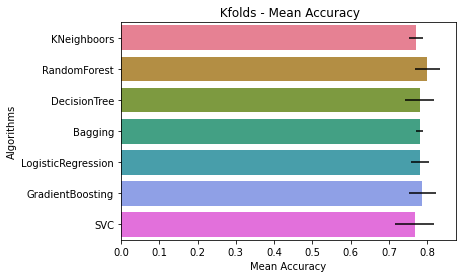

In [58]:
cv_means = [0.77, 0.80, 0.78, 0.78, 0.782, 0.787, 0.767]
cv_std = [0.018, 0.033, 0.038, 0.01, 0.024, 0.035, 0.051]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "RandomForest",
                     "DecisionTree",
                     "Bagging",                     
                     "LogisticRegression",
                     "GradientBoosting",
                     "SVC"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title(" Kfolds - Mean Accuracy")

#### Plotando média dos resultados com o método de StratifiedKFold 

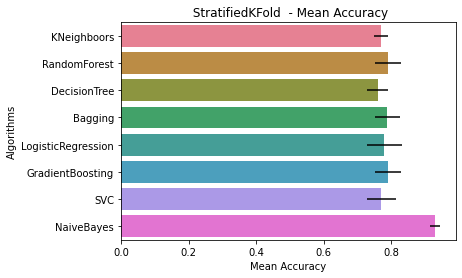

In [59]:
import seaborn as sns
cv_means = [0.77, 0.79, 0.76, 0.789, 0.779, 0.79, 0.771, 0.93]
cv_std = [ 0.021, 0.039 , 0.032, 0.036, 0.052, 0.038, 0.044, 0.014] 

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "RandomForest",
                     "DecisionTree",
                     "Bagging",                     
                     "LogisticRegression",
                     "GradientBoosting",
                     "SVC",
                     "NaiveBayes"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title(" StratifiedKFold  - Mean Accuracy")

In [11]:
# knn
knn_ACC=0.7897727272727273 
knn_std_ACC=0.0
knn_AUC=0.7675362431056283 
knn_std_AUC=0.017871347059372593
knn_Precision=0.7817934296119742 
knn_std_Precision= 0.021851564740781704
knn_Recall=0.7675362431056283 
knn_std_Recall=0.01787134705937258

# randomForest
rf_ACC = 0.8409090909090909 
rf_std_ACC = 0.0
rf_AUC = AUC = 0.7936785617772566 
rf_std_AUC = 0.025786922381247378
rf_Precision = 0.8156883259845282 
rf_std_Precision = 0.01933057829939619
rf_Recall = 0.7936785617772566  
rf_std_Recall = 0.02578692238124737

# decision tree
dt_ACC=0.8238636363636364 
dt_std_ACC=0.0
dt_AUC=0.7766678262798207 
dt_std_AUC=0.022194207337981102
dt_Precision=0.8058388784009031
dt_std_Precision=0.008736241154323903
dt_Recall=0.7766678262798207 
dt_std_Recall=0.022194207337981112

# Bagging

bg_ACC =0.8295454545454546 
bg_std_ACC =0.0
bg_AUC =0.8001751022409792 
bg_std_AUC =0.025273766305578017
bg_Precision =0.8150738820517921
bg_std_Precision =0.026044154360896465
bg_Recall =0.8001751022409792
bg_std_Recall =0.025273766305578017

# Regressão  Logistica
lr_ACC= 0.7897727272727273 
lr_std_ACC=0.0
lr_AUC= 0.7876385779920259
lr_std_AUC= 0.02955855618490570
lr_Precision=0.7865163148443386 
lr_std_Precision= 0.02627913414251922
lr_Recall= 0.7876385779920259
lr_std_Recall= 0.02955855618490564

# Gradient Boosting
gb_ACC =0.8068181818181818 
gb_std_ACC =0.0
gb_AUC =0.7854739079831441 
gb_std_AUC =0.032810786169173906
gb_Precision =0.8106239215267019 
gb_std_Precision = 0.03905360420006681
gb_Recall =0.7854739079831441 
gb_std_Recall =0.032810786169173885

In [90]:
# criando a tabela dos resultados Kfolds
modelo = ["KNeighboors","RandomForest","DecisionTree","Bagging","LogisticRegression","GradientBoosting","SVC","NaiveBayes"]

data = {
'Modelo': modelo,
'ACC': [knn_av_acc,rf_av_acc,dt_av_acc,bg_av_acc,lr_av_acc,gb_av_acc,svc_av_acc, nb_av_acc],
'ACC_Std': [knn_std_acc,rf_std_acc,dt_std_acc,bg_std_acc,lr_std_acc,gb_std_acc,svc_std_acc,nb_std_acc],
'AUC': [knn_av_auc,rf_av_auc,dt_av_auc,bg_av_auc,lr_av_auc,gb_av_auc,svc_av_auc,nb_av_auc],
'AUC_std': [knn_std_auc,rf_std_auc,dt_std_auc,bg_std_auc,lr_std_auc,gb_std_auc,svc_std_auc,nb_std_auc],
'Precision': [knn_av_prec,rf_av_prec,dt_av_prec,bg_av_prec,lr_av_prec,gb_av_prec,svc_av_prec,nb_av_prec],
'Precision_Std': [knn_std_prec,rf_std_prec,dt_std_prec,bg_std_prec,lr_std_prec,gb_std_prec,svc_std_prec,nb_std_prec],
'Recall': [knn_av_vrecall,rf_av_vrecall,dt_av_vrecall,bg_av_vrecall,lr_av_vrecall,gb_av_vrecall,svc_av_vrecall,nb_av_vrecall],
'Recall_std': [knn_std_recall,rf_std_recall,dt_std_recall,bg_std_recall,lr_std_recall,gb_std_recall,svc_std_recall,nb_std_recall]
}

print('Random forest apresentou os melhores resultados na avaliação dos modelos')
print('\nTabela com as métricas de medição da classificação usando o método K-fold ')

df = pd.DataFrame(data).sort_values(by=['Precision','Precision_Std'], ascending=False)
df

Random forest apresentou os melhores resultados na avaliação dos modelos
tabela


,Modelo,ACC,ACC_Std,AUC,AUC_std,Precision,Precision_Std,Recall,Recall_std
1,RandomForest,0.840909,0.000000,0.793679,0.025787,0.815688,0.019331,0.793679,0.025787
3,Bagging,0.829545,0.000000,0.800175,0.025274,0.815074,0.026044,0.800175,0.025274
5,GradientBoosting,0.806818,0.000000,0.785474,0.032811,0.810624,0.039054,0.785474,0.032811
2,DecisionTree,0.823864,0.000000,0.776668,0.022194,0.805839,0.008736,0.776668,0.022194
4,LogisticRegression,0.789773,0.000000,0.787639,0.029559,0.786516,0.026279,0.787639,0.029559
0,KNeighboors,0.789773,0.000000,0.767536,0.017871,0.781793,0.021852,0.767536,0.017871
6,SVC,0.761364,0.000000,0.761398,0.015174,0.771224,0.011516,0.761398,0.015174
7,NaiveBayes,0.767323,0.069577,0.830575,0.058585,0.674278,0.090493,0.791176,0.093888


In [14]:
import pandas as pd
# criando a tabela dos resultados 
modelo = ["KNeighboors", "RandomForest", "DecisionTree", "Bagging", "LogisticRegression", "GradientBoosting"]

data_kf = {
'Modelo': modelo,
'ACC': [knn_ACC, rf_ACC, dt_ACC, bg_ACC, lr_ACC, gb_ACC],
'ACC_Std': [knn_std_ACC, rf_std_ACC, dt_std_ACC, bg_std_ACC, lr_std_ACC, gb_std_ACC],
'AUC': [knn_AUC, rf_AUC, dt_AUC, bg_AUC, lr_AUC, gb_AUC],
'AUC_std': [knn_std_AUC, rf_std_AUC, dt_std_AUC, bg_std_AUC, lr_std_AUC, gb_std_AUC],
'Precision': [knn_Precision, rf_Precision, dt_Precision, bg_Precision, lr_Precision, gb_Precision],
'Precision_Std': [knn_std_Precision, rf_std_Precision, dt_std_Precision, bg_std_Precision, lr_std_Precision, gb_std_Precision],
'Recall': [knn_Recall, rf_Recall, dt_Recall, bg_Recall, lr_Recall, gb_Recall],
'Recall_std': [knn_std_Recall, rf_std_Recall, dt_std_Recall, bg_std_Recall, lr_std_Recall, gb_std_Recall]
}

df_kf = pd.DataFrame(data_kf).sort_values(by=['AUC', 'Precision'], ascending=False)
df_kf

,Modelo,ACC,ACC_Std,AUC,AUC_std,Precision,Precision_Std,Recall,Recall_std
3,Bagging,0.829545,0.0,0.800175,0.025274,0.815074,0.026044,0.800175,0.025274
1,RandomForest,0.840909,0.0,0.793679,0.025787,0.815688,0.019331,0.793679,0.025787
4,LogisticRegression,0.789773,0.0,0.787639,0.029559,0.786516,0.026279,0.787639,0.029559
5,GradientBoosting,0.806818,0.0,0.785474,0.032811,0.810624,0.039054,0.785474,0.032811
2,DecisionTree,0.823864,0.0,0.776668,0.022194,0.805839,0.008736,0.776668,0.022194
0,KNeighboors,0.789773,0.0,0.767536,0.017871,0.781793,0.021852,0.767536,0.017871


Bagging e Radom Forest obtiveram resultado parecidos considerando o desvio padrão e usando o metodo de estratificado. 
Nos proximos passos usarei o Random Forest para a seleção de atributos.

### Selecionando Atributos

In [138]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score

def classification_StratifiedKFold_BestModel(X, y, n_folds):
# usando metodo estratificado, usa uma amostra mais representativa do dataset 
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    

    vauc = list()
    vprecision = list()
    vrecall = list()
    vaccuracy = list()
    bkp_recall = 0
    dic_metrica = {'accuracy': 0, 'auc': 0, 'precision': 0,  'recall': 0}
    dic_result_mean = {}
    for train_out, test_out in cv.split(X, y):
        train_x, train_y = X[train_out], y[train_out]
        test_x, test_y = X[test_out], y[test_out]
        
        # validação cruzada interna (treinamento) e metricas de validação
        model = RandomForestClassifier(criterion='gini', max_depth=5, max_features='auto', n_estimators=50)
        model.fit(train_x, train_y)
                      
        
        # predição
        pred_y = model.predict(test_x) 
        
        # validação e exlporando as metricas
        fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
        auc = metrics.auc(fpr, tpr)
        vauc.append(auc)
        
        precision = precision_score(test_y, pred_y, average='macro', zero_division = 0)
        vprecision.append(precision)
        
        recall = recall_score(test_y, pred_y, average='macro')
        vrecall.append(recall)
        
        accuracy = accuracy_score(test_y, pred_y)
        vaccuracy.append(accuracy)
        
        # usamos para retornar o melhor resultado da metrica 'precisao',
        # com finalidade de analisar a influencia do desbalancemaneto da classe alvo. 
        # TODO: fazer outras analises com outras metricas
        if precision > dic_metrica['precision']:
            dic_metrica['auc'] = auc
            dic_metrica['precision'] = precision
            dic_metrica['accuracy'] = accuracy
            dic_metrica['recall'] = recall       
        
    
        print(classification_report(test_y, pred_y))
        print('.', end="")      
        
    print('\n Analise das métricas pelo método StratifiedKFold')
    
    dic_result_mean['av_accuracy'] = np.mean(vaccuracy)
    dic_result_mean['std_accuracy'] = np.std(vaccuracy)
    dic_result_mean['av_auc'] = np.mean(vauc)
    dic_result_mean['std_auc'] = np.std(vauc)
    dic_result_mean['av_prec'] = np.mean(vprecision)
    dic_result_mean['std_prec'] = np.std(vprecision)
    dic_result_mean['av_vrecall'] = np.mean(vrecall)
    dic_result_mean['std_vrecall'] = np.std(vrecall)
    
        
    return dic_result_mean, best_model, dic_metrica

In [82]:
n_folds = 5 # vc externo folds 

rf_result_mean, rf_Strati_best_model, rf_best_metrica = classification_StratifiedKFold_BestModel(X, y, n_folds)

print('\nStratifiedKFold Mean')
for k, v in rf_result_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold best')
for k, v in rf_best_metrica.items():
    print(k, ':', v)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       109
           1       0.78      0.69      0.73        68

    accuracy                           0.81       177
   macro avg       0.80      0.79      0.79       177
weighted avg       0.81      0.81      0.81       177

.              precision    recall  f1-score   support

           0       0.79      0.88      0.83       108
           1       0.76      0.62      0.68        68

    accuracy                           0.78       176
   macro avg       0.77      0.75      0.76       176
weighted avg       0.78      0.78      0.77       176

.              precision    recall  f1-score   support

           0       0.88      0.91      0.89       108
           1       0.85      0.81      0.83        68

    accuracy                           0.87       176
   macro avg       0.86      0.86      0.86       176
weighted avg       0.87      0.87      0.87       176

.              pr

In [134]:
#neested crossvalidation search grid Mean
sg_av_acc = 0.8195097037793667
sg_std_acc = 0.03989088548255213
sg_av_auc = 0.796250742721331
sg_std_auc = 0.04603230352339382
sg_av_prec = 0.8178899270009039
sg_std_prec = 0.04245289334205905
sg_av_vrecall = 0.796250742721331
sg_std_vrecall = 0.0460323035233938


# StratifiedKFold  best parameter Mean
bp_av_acc = 0.8252182845403183
bp_std_acc = 0.03367167798809643
bp_av_auc = 0.8030516080030381
bp_std_auc = 0.03961034761439171
bp_av_prec = 0.8228850021376986
bp_std_prec = 0.03449094063892993
bp_av_vrecall = 0.8030516080030381
bp_std_vrecall = 0.039610347614391646

# criando a tabela dos resultados 
modelo = ["RandomForestSearchGrid","RandomForestBestHyperParameters"]

data_hp = {
'Modelo': modelo,
'ACC':[sg_av_acc,bp_av_acc],
'ACC_Std':[sg_std_acc,bp_std_acc],
'AUC':[sg_av_auc,bp_av_auc],
'AUC_std':[sg_std_auc,bp_std_auc],
'Precision':[sg_av_prec,bp_av_prec],
'Precision_Std':[sg_std_prec,bp_std_prec],
'Recall':[sg_av_vrecall ,bp_av_vrecall],
'Recall_std':[sg_std_vrecall,bp_std_vrecall]
}


df = pd.DataFrame(data_hp).sort_values(by=['Precision','AUC'], ascending=False)
df

,Modelo,ACC,ACC_Std,AUC,AUC_std,Precision,Precision_Std,Recall,Recall_std
1,RandomForestBestHyperParameters,0.825218,0.033672,0.803052,0.039610,0.822885,0.034491,0.803052,0.039610
0,RandomForestSearchGrid,0.819510,0.039891,0.796251,0.046032,0.817890,0.042453,0.796251,0.046032


In [108]:
attributes = train.drop("Survived", axis=1).columns

print(attributes)

# X = train.drop("Survived", axis=1).to_numpy()
# y = train["Survived"]
# X_test  = test.drop("PassengerId", axis=1).copy()
# X.shape, y.shape, X_test.shape

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone', 'Title'], dtype='object')


((881, 7), (881,), (418, 7))

### Recursive Feature Elimination

AUC média: 0.782 Precisão média: 0.781
AUC média: 0.787 Precisão média: 0.784
AUC média: 0.751 Precisão média: 0.785
AUC média: 0.814 Precisão média: 0.827
AUC média: 0.804 Precisão média: 0.819


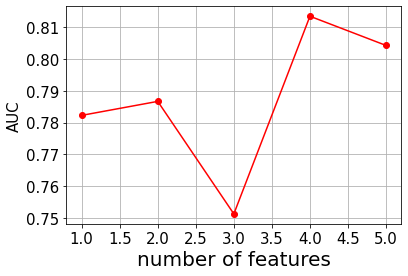

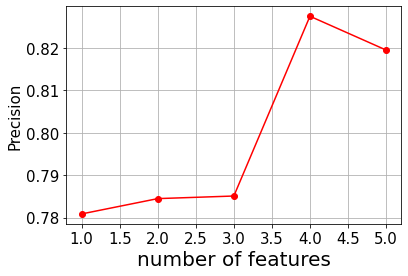

In [110]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


n_folds = 5 # cv folds externos
k_folds = 10 # cv folds internos

vresults = []
vresults_precision = []
for nf in range(1,X.shape[1]):
    X = train.drop("Survived", axis=1).to_numpy()
    
    model = RandomForestClassifier()
    
    parameters = {    
    'n_estimators':[50],
    'max_depth':[5],
    'max_features':['auto'],
    'criterion':['gini']
    }
    selector = RFE(model, n_features_to_select=nf, step=1)
    selector = selector.fit(X, y)
    #print(selector.support_)
    #print(selector.ranking_)

    selected = []
    for i in range(0,len(selector.support_)):
        if(selector.support_[i] == True):
            #print(attributes[i])
            selected.append(attributes[i])
            
    X = train[selected].to_numpy()

    rf_result_mean, rf_Strati_best_model, rf_best_metrica = classification_StratifiedKFold(X, y, n_folds, model, parameters)
    
    print('AUC média: {:.3f} Precisão média: {:.3f}'.format(rf_result_mean['av_auc'], rf_result_mean['av_prec']))
    
    vresults.append(rf_result_mean['av_auc'])
    vresults_precision.append(rf_result_mean['av_prec'])

    
plt.plot(range(1,len(vresults)+1), vresults, 'ro-')
plt.xlabel('number of features', fontsize=20)
plt.ylabel('AUC', fontsize=15);
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.grid(True)
plt.show(True)

plt.plot(range(1,len(vresults_precision)+1), vresults_precision, 'ro-')
plt.xlabel('number of features', fontsize=20)
plt.ylabel('Precision', fontsize=15);
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.grid(True)
plt.show(True)

### Feature importance

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

X = train.drop("Survived", axis=1).to_numpy()

n_folds = 5 # cv folds externos
# k_folds = 10 # cv folds internos
sss = StratifiedShuffleSplit(n_splits = 20,       # 20 simulações.
                             test_size = 0.2,     # 20% do dataset será de testes.
                             random_state = 42)   # Permitir a reprodutibilidade.
hp_grid = {    
    'n_estimators':[50],
    'max_depth':[5],
    'max_features':['auto'],
    'criterion':['gini']
    }
# define cv externo
cv_outer = KFold(n_folds, shuffle=True)
test_acc_results = list()
v = []
vauc = list()
vprecision = list()
vrecall = list()
vaccuracy = list()
# loop CV externo 
for train_i, test_i in cv_outer.split(X):
  # usa indices para pegar os dados efetivamente
    train_x, train_y = X[train_i], y[train_i]
    test_x, test_y = X[test_i], y[test_i]
    
    # modelo base
    model = RandomForestClassifier()
    
    # cross validation interno (variando conjunto de validação) 
    grid_search_cv = GridSearchCV(model, hp_grid, cv=sss, scoring='roc_auc', refit=True)
    
    result = grid_search_cv.fit(train_x, train_y)
    # retreina melhor modelo  com (treino + validação)
    best_model = result.best_estimator_
    # faz a previsão no fold de teste 
    pred_y = best_model.predict(test_x) 
    # evaluate and store the results
    print('Accuracy:', accuracy_score(test_y, pred_y))
    
    # validação e exlporando as metricas
    fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
    auc = metrics.auc(fpr, tpr)
    vauc.append(auc)

    precision = precision_score(test_y, pred_y, average='macro', zero_division = 0)
    vprecision.append(precision)

    recall = recall_score(test_y, pred_y, average='macro')
    vrecall.append(recall)

    accuracy = accuracy_score(test_y, pred_y)
    vaccuracy.append(accuracy)
    
    
    v.append(best_model.feature_importances_)
    
print('Mean')    
print('av_accuracy' ,np.mean(vaccuracy))
print('std_accuracy' ,np.std(vaccuracy))
print('av_auc' ,np.mean(vauc))
print('std_auc' ,np.std(vauc))
print('av_prec' ,np.mean(vprecision))
print('std_prec' ,np.std(vprecision))
print('av_vrecall' ,np.mean(vrecall))
print('std_vrecall' ,np.std(vrecall))

Accuracy: 0.8022598870056498
Accuracy: 0.7954545454545454
Accuracy: 0.8181818181818182
Accuracy: 0.8238636363636364
Accuracy: 0.8238636363636364
Mean
av_accuracy 0.8127247046738573
std_accuracy 0.011710700188350054
av_auc 0.7903473944965687
std_auc 0.01573232147491379
av_prec 0.8105862220092078
std_prec 0.01870182319442363
av_vrecall 0.7903473944965685
std_vrecall 0.01573232147491377


In [114]:
v = np.array(v)
v = np.mean(v,axis = 0)
v = v/np.sum(v)

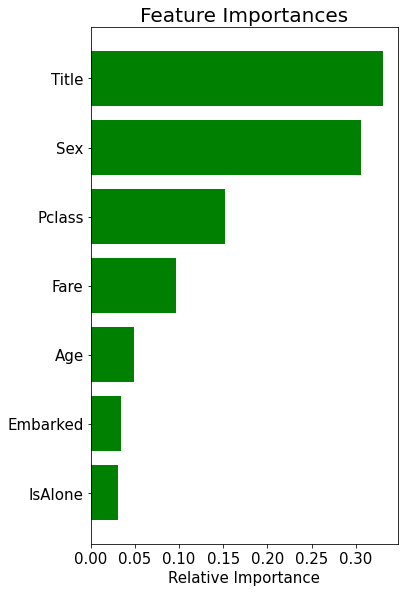

In [130]:
importances = v

indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.figure(figsize=(5,8))
plt.title('Feature Importances', size=20)
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
# plt.xlim([0.0, 0.25])
plt.show()

In [141]:

X = train.drop(["Survived", 'IsAlone','Embarked'], axis=1).to_numpy()
X

array([[3, 0, 1, 0, 1],
       [1, 1, 2, 3, 3],
       [3, 1, 1, 0, 2],
       ...,
       [3, 1, 0, 2, 2],
       [1, 0, 1, 2, 1],
       [3, 0, 1, 0, 1]], dtype=int64)

In [142]:
n_folds = 5 # vc externo folds 

rf_result_featimportance_mean, rf_Strati_featimportance_best_model, rf_featimportance_best_metrica = classification_StratifiedKFold_BestModel(X, y, n_folds)

print('\nStratifiedKFold Mean')
for k, v in rf_result_featimportance_mean.items():
    print(k, ':', v)
    
print('\nStratifiedKFold best')
for k, v in rf_featimportance_best_metrica.items():
    print(k, ':', v)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       109
           1       0.79      0.66      0.72        68

    accuracy                           0.80       177
   macro avg       0.80      0.78      0.78       177
weighted avg       0.80      0.80      0.80       177

.              precision    recall  f1-score   support

           0       0.79      0.89      0.83       108
           1       0.78      0.62      0.69        68

    accuracy                           0.78       176
   macro avg       0.78      0.75      0.76       176
weighted avg       0.78      0.78      0.78       176

.              precision    recall  f1-score   support

           0       0.88      0.90      0.89       108
           1       0.83      0.81      0.82        68

    accuracy                           0.86       176
   macro avg       0.86      0.85      0.86       176
weighted avg       0.86      0.86      0.86       176

.              pr

In [144]:
# criando a tabela dos resultados 
modelo = ["RandomForestFeatImportance","RandomForestNoFeatImportance"]
data_feat = {
'Modelo': modelo,
'ACC':[0.826,0.825],
'ACC_Std':[0.030,0.033],
'AUC':[0.806,0.803],
'AUC_std':[0.039,0.039],
'Precision':[0.822,0.822],
'Precision_Std':[0.028,0.034],
'Recall':[0.806,0.803],
'Recall_std':[0.039,0.039]
}
df = pd.DataFrame(data_feat).sort_values(by=['Precision','AUC'], ascending=False)
df

,Modelo,ACC,ACC_Std,AUC,AUC_std,Precision,Precision_Std,Recall,Recall_std
0,RandomForestFeatImportance,0.826,0.030,0.806,0.039,0.822,0.028,0.806,0.039
1,RandomForestNoFeatImportance,0.825,0.033,0.803,0.039,0.822,0.034,0.803,0.039


### **A estratégia de seleção de atributos não melhorou significativamente a acurácia e nem precisão do modelo. Porém diminui drasticamente no número de atributos da base de dados e isso terá um ganho de perfomance relevante quando se trata de uma grande base de dados.**